In [ ]:
#########################################################
# Computer Vision FINAL HOMEWORK
# Author : Soyeong Yang (Chung-Ang University)
# Date : 2021.06.16
#########################################################

In [3]:
# Library Importing
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Original Image')

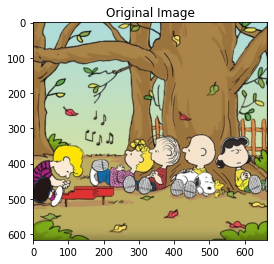

In [4]:
# 1st Image reading & showing
img1 = cv.imread('./original.png')

plt.imshow(img1[:,:,::-1])
plt.title('Original Image')

Text(0.5, 1.0, 'Subsampled Image1')

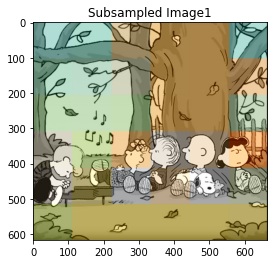

In [19]:
## 1/100로 CrCb 채널을 Subsampling 하는 예시 코드
height = img1.shape[0]
width = img1.shape[1]

# YCrCb 이미지로 변환 (cvtColor 함수 활용)
img1_ycrcb = cv.cvtColor(img1, cv.COLOR_BGR2YCrCb)

# 채널별로 matrix 분리
img1_y = img1_ycrcb[:,:,0]
img1_cr = img1_ycrcb[:,:,1]
img1_cb = img1_ycrcb[:,:,2]

# Cr, Cb 채널 해상도 축소
img1_cr_resized = cv.resize(img1_cr, dsize=(width//100, height//100))
img1_cb_resized = cv.resize(img1_cb, dsize=(width//100, height//100))

# 축소된 Cr, Cb 채널의 크기를 원본 Y 채널과 취합하기 위해 해상도 확대
img1_cr_enlarged = cv.resize(img1_cr_resized, dsize=(width, height), interpolation=cv.INTER_NEAREST)
img1_cb_enlarged = cv.resize(img1_cb_resized, dsize=(width, height), interpolation=cv.INTER_NEAREST)

# Subsampled Image를 만들기 위해 Y, Cb, Cr 이미지들을 취합
img1_ycrcb_subsampled = np.dstack((img1_y, img1_cr_enlarged, img1_cb_enlarged))

# Subsampled Image를 YCrCb 이미지에서 BGR이미지로 변환
img1_subsampled = cv.cvtColor(img1_ycrcb_subsampled, cv.COLOR_YCrCb2BGR)

# Image Showing
plt.imshow(img1_subsampled[:,:,::-1])
plt.title('Subsampled Image1')

Text(0.5, 1.0, 'Change Image')

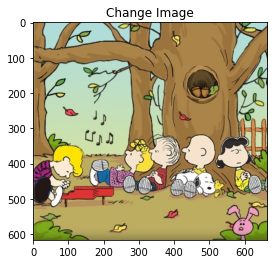

In [20]:
# 2nd Image reading & showing
img2 = cv.imread('./change.png')

plt.imshow(img2[:,:,::-1])
plt.title('Change Image')

Text(0.5, 1.0, 'Subsampled Image2')

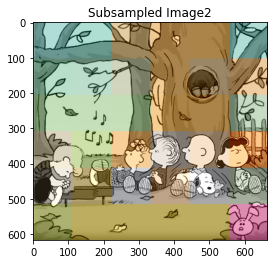

In [21]:
## 1/100로 CrCb 채널을 Subsampling 하는 예시 코드
height = img2.shape[0]
width = img2.shape[1]

# YCrCb 이미지로 변환 (cvtColor 함수 활용)
img2_ycrcb = cv.cvtColor(img2, cv.COLOR_BGR2YCrCb)

# 채널별로 matrix 분리
img2_y = img2_ycrcb[:,:,0]
img2_cr = img2_ycrcb[:,:,1]
img2_cb = img2_ycrcb[:,:,2]

# Cr, Cb 채널 해상도 축소
img2_cr_resized = cv.resize(img2_cr, dsize=(width//100, height//100))
img2_cb_resized = cv.resize(img2_cb, dsize=(width//100, height//100))

# 축소된 Cr, Cb 채널의 크기를 원본 Y 채널과 취합하기 위해 해상도 확대
img2_cr_enlarged = cv.resize(img2_cr_resized, dsize=(width, height), interpolation=cv.INTER_NEAREST)
img2_cb_enlarged = cv.resize(img2_cb_resized, dsize=(width, height), interpolation=cv.INTER_NEAREST)

# Subsampled Image를 만들기 위해 Y, Cb, Cr 이미지들을 취합
img2_ycrcb_subsampled = np.dstack((img2_y, img2_cr_enlarged, img2_cb_enlarged))

# Subsampled Image를 YCrCb 이미지에서 BGR이미지로 변환
img2_subsampled = cv.cvtColor(img2_ycrcb_subsampled, cv.COLOR_YCrCb2BGR)

# Image Showing
plt.imshow(img2_subsampled[:,:,::-1])
plt.title('Subsampled Image2')

[[  0   1   2 ... 662 663 664]
 [  0   1   2 ... 662 663 664]
 [  0   1   2 ... 662 663 664]
 ...
 [  0   1   2 ... 662 663 664]
 [  0   1   2 ... 662 663 664]
 [  0   1   2 ... 662 663 664]] [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [614 614 614 ... 614 614 614]
 [615 615 615 ... 615 615 615]
 [616 616 616 ... 616 616 616]]


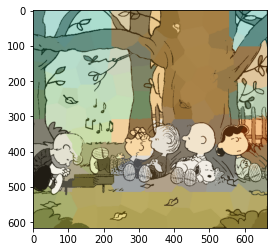

In [22]:
# 첫 번째 사진: 위치 정보 포함한 Clustering-based Color Segmentation 추출
from sklearn.cluster import MiniBatchKMeans

NUM_CLUSTER = 150

(h1, w1) = img1_subsampled.shape[:2]

img1_lab = cv.cvtColor(img1_subsampled, cv.COLOR_BGR2Lab)
vector1_lab = img1_lab.reshape((img1_subsampled.shape[0] * img1_subsampled.shape[1], 3))

x1_coordinate, y1_coordinate = np.meshgrid(np.arange(img1_subsampled.shape[1]), np.arange(img1_subsampled.shape[0]))

print(x1_coordinate, y1_coordinate)


# 각 픽셀의 좌표값이 저장된 Matrix (x1_coordinate, y1_coordinate)을 벡터로 변환
x1_coordinate_vector = x1_coordinate.reshape((img1_subsampled.shape[0] * img1_subsampled.shape[1], 1))
y1_coordinate_vector = y1_coordinate.reshape((img1_subsampled.shape[0] * img1_subsampled.shape[1], 1))

# 각 픽셀의 색상정보와 좌표값을 붙이기
vector1_labxy = np.hstack((vector1_lab, x1_coordinate_vector, y1_coordinate_vector))

# Clustering
clt1 = MiniBatchKMeans(n_clusters = NUM_CLUSTER)
labels1 = clt1.fit_predict(vector1_labxy)
quant1 = clt1.cluster_centers_.astype("uint8")[labels1]

# reshape the feature vectors to images
quant1 = quant1[:,:3].reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant1 = cv.cvtColor(quant1, cv.COLOR_Lab2BGR)

# display the images and wait for a keypress
plt.imshow(quant1[:,:,::-1])

[[  0   1   2 ... 662 663 664]
 [  0   1   2 ... 662 663 664]
 [  0   1   2 ... 662 663 664]
 ...
 [  0   1   2 ... 662 663 664]
 [  0   1   2 ... 662 663 664]
 [  0   1   2 ... 662 663 664]] [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [614 614 614 ... 614 614 614]
 [615 615 615 ... 615 615 615]
 [616 616 616 ... 616 616 616]]


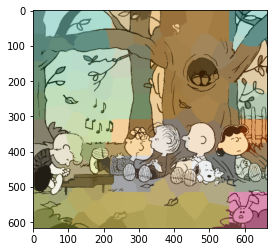

In [23]:
# 두 번째 사진: 위치 정보 포함한 Clustering-based Color Segmentation 추출
NUM_CLUSTER = 150

(h2, w2) = img2_subsampled.shape[:2]

img2_lab = cv.cvtColor(img2_subsampled, cv.COLOR_BGR2Lab)
vector2_lab = img2_lab.reshape((img2_subsampled.shape[0] * img2_subsampled.shape[1], 3))

x2_coordinate, y2_coordinate = np.meshgrid(np.arange(img2_subsampled.shape[1]), np.arange(img2_subsampled.shape[0]))

print(x2_coordinate, y2_coordinate)


# 각 픽셀의 좌표값이 저장된 Matrix (x2_coordinate, y2_coordinate)을 벡터로 변환
x2_coordinate_vector = x2_coordinate.reshape((img2_subsampled.shape[0] * img2_subsampled.shape[1], 1))
y2_coordinate_vector = y2_coordinate.reshape((img2_subsampled.shape[0] * img2_subsampled.shape[1], 1))

# 각 픽셀의 색상정보와 좌표값을 붙이기
vector2_labxy = np.hstack((vector2_lab, x2_coordinate_vector, y2_coordinate_vector))

# Clustering
clt2 = MiniBatchKMeans(n_clusters = NUM_CLUSTER)
labels2 = clt2.fit_predict(vector2_labxy)
quant2 = clt2.cluster_centers_.astype("uint8")[labels2]

# reshape the feature vectors to images
quant2 = quant2[:,:3].reshape((h2, w2, 3))

# convert from L*a*b* to RGB
quant2 = cv.cvtColor(quant2, cv.COLOR_Lab2BGR)

# display the images and wait for a keypress
plt.imshow(quant2[:,:,::-1])

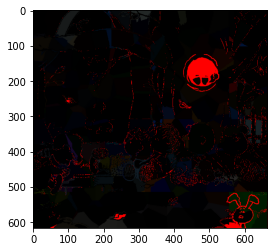

In [24]:
# compute difference로 두 이미지의 clustering 색상 차이 구하기
difference = cv.subtract(quant1, quant2)

# color the mask red
Conv_hsv_Gray = cv.cvtColor(difference, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(Conv_hsv_Gray, 0, 255,cv.THRESH_BINARY_INV |cv.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]

plt.imshow(difference[:,:,::-1])